# CS5990 Project

 This project covers how to use the [Tensorflow Object Detection API ](https://github.com/tensorflow/models/tree/master/research/object_detection) in google colaboratory. 

There are two sources for this code: 

*   [Training for the custom images source](https://github.com/EdjeElectronics/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/blob/master/README.md)
*   object_detection_tutorial.ipynb in [Object Detection API repository](https://github.com/tensorflow/models/tree/master/research/object_detection)

There are three sections to this code. First is building the object detection environment; these instructions can easily be found in the installation instructions in the API. Since the libraries are already installed in colab, it taks a lot of the difficulty out of the setup process. Second, we set up the training loop; this includes downloading the FasterRCNN pretrained model in order to leverage transfer learning. The code and data comes from the Edje tutorial for this section. Third, we run the object detector using code from object_detection_tutorial.ipynb. This allows us to make a prediction about there being a playing card of one of the six classes in the images.




**Directory Structure of uploaded files **


/custom

    -/images
        -/test
            -.JPG files of images
            -.xml files of bounding boxes
        -/train
            -.JPG files of images
            -.xml files of bounding boxes from imageLbl
    -/testing
        -.JPG files
    -/training
        -faster_rcnn_inception_v2_pets.config
        -labelmap.pbtxt
    -generate_tfrecord.py
    -sizeChecker.py
    -xml_to_csv.py
    
    
**What should be modified**


*   Add your own images and xml files from labelImg to custom/images/test/ and custom/images/train
*   Add your own images to custom/testing
*   Change faster_rcnn_inception_v2_pets.config and labelmap.pbtxt



In [0]:
#command to remove all working files in colab
!rm -r /content/*

In [0]:
#IF YOU WANT TO UPLOAD YOUR OWN CUSTOM DATASET THEN COMMENT THIS CODE OUT, otherwise this contains all of the needed files to run this colab notebook
!git clone https://github.com/David-Hughes3/CS5990_project.git
!mv /content/CS5990_project/custom /content/

Cloning into 'CS5990_project'...
remote: Enumerating objects: 796, done.
remote: Counting objects: 100% (796/796), done.
remote: Compressing objects: 100% (424/424), done.
remote: Total 796 (delta 385), reused 764 (delta 369), pack-reused 0
Receiving objects: 100% (796/796), 36.83 MiB | 35.62 MiB/s, done.
Resolving deltas: 100% (385/385), done.


In [0]:
# #uncomment this block if you want to upload your own custom folder (as a zip file)
# !unzip custom.zip

# Set up Object Detection Environment

**Install the Prereqs for the Object Detection API and test using the model builder test**

In [0]:
#library dependencies
!apt-get install protobuf-compiler python-pil python-lxml python-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-pil is already the newest version (5.1.0-1).
python-tk is already the newest version (2.7.15~rc1-1).
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-lxml is already the newest version (4.2.1-1ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


In [0]:
#clone the tensorflow models API that contains the /content/models/research/object_detection folder
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 24740, done.
remote: Total 24740 (delta 0), reused 0 (delta 0), pack-reused 24740
Receiving objects: 100% (24740/24740), 507.74 MiB | 29.67 MiB/s, done.
Resolving deltas: 100% (14545/14545), done.
Checking out files: 100% (2858/2858), done.


In [0]:
#COCO API installation
#pretrained models
!git clone https://github.com/cocodataset/cocoapi.git
!cd cocoapi/PythonAPI && make && cp -r pycocotools /content/models/research/

Cloning into 'cocoapi'...
remote: Enumerating objects: 947, done.
remote: Total 947 (delta 0), reused 0 (delta 0), pack-reused 947
Receiving objects: 100% (947/947), 11.69 MiB | 19.03 MiB/s, done.
Resolving deltas: 100% (565/565), done.
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages

In [0]:
cd /content/models/research

/content/models/research


In [0]:
#Add Libraries to PYTHONPATH
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim
!export PYTHONPATH=/content/models/research/object_detection/:$PYTHONPATH

env: PYTHONPATH=/content/models/research:/content/models/research/slim


In [0]:
#"Tensorflow Object Detection API uses Protobufs to configure model and training parameters"
#"Before the framework can be used, the Protobuf libraries must be compiled" in "tensorflow/models/research/ directory"
!protoc object_detection/protos/*.proto --python_out=.

In [0]:
#" test that you have correctly installed the Tensorflow Object Detection API by running the following command"
!python object_detection/builders/model_builder_test.py


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

............s...
----------------------------------------------------------------------
Ran 16 tests in 0.078s

OK (skipped=1)


# Set up for the Training process

**Get Pretrained model**

We download a pretrained model to use transfer learning from Tensorflows model zoo.

In [0]:
cd object_detection

/content/models/research/object_detection


In [0]:
#download the FasterRCNN pretrained model from tensorflow's model zoo
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
!tar -xvf faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

--2019-03-15 06:38:50--  http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.141.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149119618 (142M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’

faster_rcnn_incepti 100%[===================>] 142.21M   142MB/s    in 1.0s    

2019-03-15 06:38:51 (142 MB/s) - ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [149119618/149119618]

faster_rcnn_inception_v2_coco_2018_01_28/
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
faster_rcnn_inception_v2_coco_2018_01_28/checkpoint
faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_inception_v2_coco_2018_01_28/mode

**Get tutorial code and data**

MAKE SURE TO FOLLOW THE DIRECTORY STRUCTURE IF YOU USED CUSTOM DATA

By default this data and scripts come from the Edje Electronics tutorial. It has been changed into a specific structure to make it straightforward to move the files into the Object Detection API directory structure.

In [0]:
#copy data to /object_detection
!mkdir /content/models/research/object_detection/images
!cp -r /content/custom/images/test /content/models/research/object_detection/images
!cp -r /content/custom/images/train /content/models/research/object_detection/images 

!cp -r /content/custom/testing /content/models/research/object_detection

#copy python scripts to object_detection
!cp /content/custom/generate_tfrecord.py /content/models/research/object_detection/
!cp /content/custom/sizeChecker.py /content/models/research/object_detection/
!cp /content/custom/xml_to_csv.py /content/models/research/object_detection/

#move the modified pipeline config file and the label map file
!cp -r /content/custom/training /content/models/research/object_detection

#move the modified model_main.py
!cp /content/custom/model_main.py /content/models/research/object_detection/

In [0]:
#check if the drawn xml bounding boxes are OK
!python sizeChecker.py --move

[Ok] Directories exists
[Ok] All bounding boxes are equal or larger than 32 :-)


**XML -> CSV -> tfrecord**

Using LabelImg we made XML files that contain bounding box labels for each object in the image.  We turn these labels into a CSV file using a python script. 

Tensorflow records are TF's own binary storage format. We use another script to convert the CSV of labels and the images into .record files.

In [0]:
#create images XML files -> CSV
!python xml_to_csv.py
#generate tensorflow record files
!python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.record
!python generate_tfrecord.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=test.record

Successfully converted xml to csv.
Successfully converted xml to csv.
Successfully created the TFRecords: /content/models/research/object_detection/train.record
Successfully created the TFRecords: /content/models/research/object_detection/test.record


**Run Training**

In order to monitor the training, we first setup tensorboard in colab. There are occasional issues with using tensorboard with colab, so be aware.

To use tensorboard, simply click the link in the std output.


Next we run the command that starts the actual training process of the model. We output the output into a log file as it is too large. We output checkpoints into the training directory. The default steps are setup in the config file.

NOTE: you can stop the training early and simply continue by using Run After in the next cell.


In [0]:
#to open tensorboard open the link in the output
#NOTE: there are problems with the package and tensorboard at times
import os
LOG_DIR = '/content/models/research/object_detection/training'

if os.path.isfile('/content/ngrok-stable-linux-amd64.zip'):
  print('already downloaded zip file')
else:
  !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -P /content/
  !unzip /content/ngrok-stable-linux-amd64.zip


if not os.path.exists(LOG_DIR):
  os.makedirs(LOG_DIR)
  
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR))

get_ipython().system_raw('./ngrok http 6006 &')

!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2019-03-15 06:39:12--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.165.51.142, 52.54.84.112, 52.45.248.161, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.165.51.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14910739 (14M) [application/octet-stream]
Saving to: ‘/content/ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  14.22M  63.1MB/s    in 0.2s    

2019-03-15 06:39:12 (63.1 MB/s) - ‘/content/ngrok-stable-linux-amd64.zip’ saved [14910739/14910739]

Archive:  /content/ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
https://37353c2f.ngrok.io


In [0]:
#command that runs the training
!python /content/models/research/object_detection/model_main.py \
    --pipeline_config_path=/content/models/research/object_detection/training/faster_rcnn_inception_v2_pets.config \
    --model_dir=/content/models/research/object_detection/training/ \
    --num_train_steps=10000 \
    --sample_1_of_n_eval_examples=1 \
    --alsologtostderr


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Maybe overwriting train_steps: 10000
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
INFO:tensorflow:Maybe overwriting load_pretrained: True
INFO:tensorflow:Ignoring config override key: load_pretrained
INFO:tensorflow:create_estimator_and_inputs: use_tpu False, export_to_tpu False
INFO:tensorflow:Using config: {'_model_dir': '/content/models/research/object_detection/training/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 500, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
,

In [0]:
# #display some random lines in the file
# fp = open("/content/training_log.txt")
# for i, line in enumerate(fp):
#   if i % 100 == 0:
#     print(line)
# fp.close()

**Export the Inference Graph**

To save and later restore the trained graph, we output the inference graph using a built in script in the object detection api

In [0]:
!cd /content/models/research/object_detection
!rm -r inference_graph

rm: cannot remove 'inference_graph': No such file or directory


In [0]:
import os
import glob
ckpts = [ i  for i in glob.glob("/content/models/research/object_detection/training/*") if '.ckpt' in i]
print(ckpts)
XXXX = 0
for f in ckpts:
  temp = (f.split('.ckpt-'))[1].split('.')[0]
  if int(temp) > XXXX:
    XXXX = int(temp) 

os.environ["TRAINING_CHECKPOINT_PREFIX"] = str("training/model.ckpt-" + str(XXXX))
    
!python export_inference_graph.py --input_type image_tensor --pipeline_config_path training/faster_rcnn_inception_v2_pets.config --trained_checkpoint_prefix $TRAINING_CHECKPOINT_PREFIX --output_directory inference_graph

['/content/models/research/object_detection/training/model.ckpt-10000.meta', '/content/models/research/object_detection/training/model.ckpt-8500.data-00000-of-00001', '/content/models/research/object_detection/training/model.ckpt-8500.index', '/content/models/research/object_detection/training/model.ckpt-8000.meta', '/content/models/research/object_detection/training/model.ckpt-8000.data-00000-of-00001', '/content/models/research/object_detection/training/model.ckpt-9500.data-00000-of-00001', '/content/models/research/object_detection/training/model.ckpt-9000.index', '/content/models/research/object_detection/training/model.ckpt-9000.meta', '/content/models/research/object_detection/training/model.ckpt-10000.index', '/content/models/research/object_detection/training/model.ckpt-8000.index', '/content/models/research/object_detection/training/model.ckpt-8500.meta', '/content/models/research/object_detection/training/model.ckpt-10000.data-00000-of-00001', '/content/models/research/object

# Run Object Detector

This code comes from the object detection api's tutorial jupyter notebook.

In [0]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
# This is needed to display the images.
%matplotlib inline 
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.12.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.12.*.')


In [0]:
#object detection tools
from utils import label_map_util
from utils import visualization_utils as vis_util

In [0]:
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = os.path.join('inference_graph','frozen_inference_graph.pb')

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('training', 'labelmap.pbtxt')

**Load frozen graph into memory**

In [0]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

**Load label maps**

In [0]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

**Helper code**

In [0]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

**Detection**

In [0]:
!mkdir /content/models/research/object_detection/testing/output
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = '/content/models/research/object_detection/testing'
#TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.JPG'.format(i)) for i in range(1, 3) ]
TEST_IMAGE_PATHS = ['/content/models/research/object_detection/testing/test1.JPG']

# Size, in inches, of the output images.
IMAGE_SIZE = (5, 3) #(W,H)

In [0]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

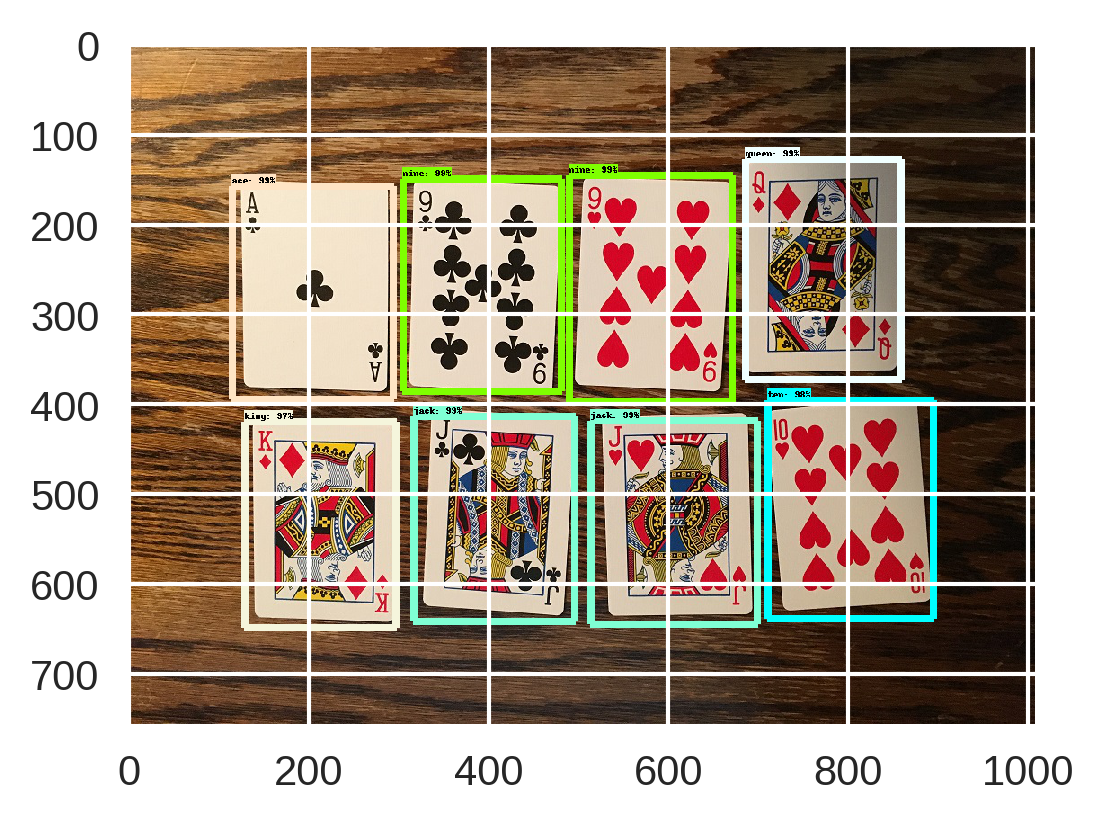

In [0]:
%matplotlib inline
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8,
      min_score_thresh=0.70)
  matplotlib.rcParams['figure.dpi']= 300 #raises the resolution of the test images with printed labels/boxes that are stored in object_detection/testing/output
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)
  plt.savefig('/content/models/research/object_detection/testing/output/' + (os.path.splitext(os.path.basename(image_path))[0]) + '.png' , dpi=300 )

# Archive

**Move the legacy version 'train.py' into the object detection folder**

train.py was combined with another file in the current version, we simply use the legacy version to train

In [0]:
#!cp /content/models/research/object_detection/legacy/train.py /content/models/research/object_detection/

In [0]:
#default is step to 10000 steps
#You can stop the training at any time and simply use Menu Bar > Runtime > Run After to stop the training early
#output steps to a log file, because the amount of text crashes the colab notebook
#!python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/faster_rcnn_inception_v2_pets.config 2> /content/training_log.txt